# Manifold Learning with t-SNE
### Pros:
1\. **Reveals Complex Structure**: Excellent for visualizing clusters and non-linear relationships.  
2\. **Non-Linear Embedding**: Captures manifold geometry effectively.  
3\. **Widely Used in Practice**: Popular in bioinformatics, NLP, and computer vision.  
4\. **Intuitive Visualization**: Makes high-dimensional data interpretable.  

### Cons:
1\. **Computationally Expensive**: Slower on large datasets.  
2\. **Not Scalable to New Data**: Embedding must be recomputed for new samples.  
3\. **Parameter Sensitivity**: Perplexity and learning rate must be carefully tuned.  
4\. **No Global Distance Meaning**: The scale of distances in the embedding is not globally meaningful.

Manifold learning can be useful for exploratory data analysis (EDA), but is rarely used if the final goal is supervised learning.

In [13]:
#Imports
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


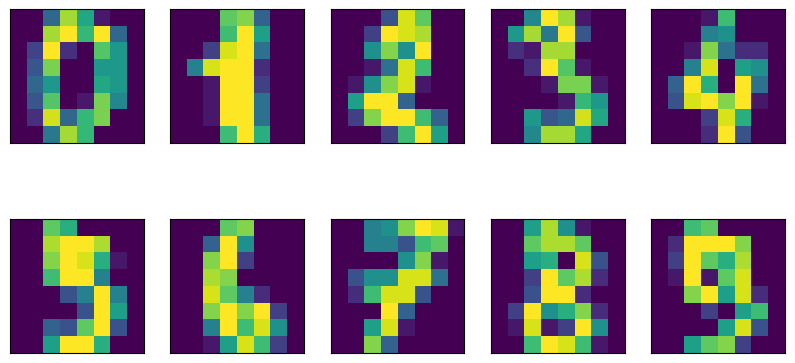

In [14]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Let’s use PCA to visualize the data reduced to two dimensions. We plot the first two principal components, and color each dot by its class

Text(0, 0.5, 'Second principal component')

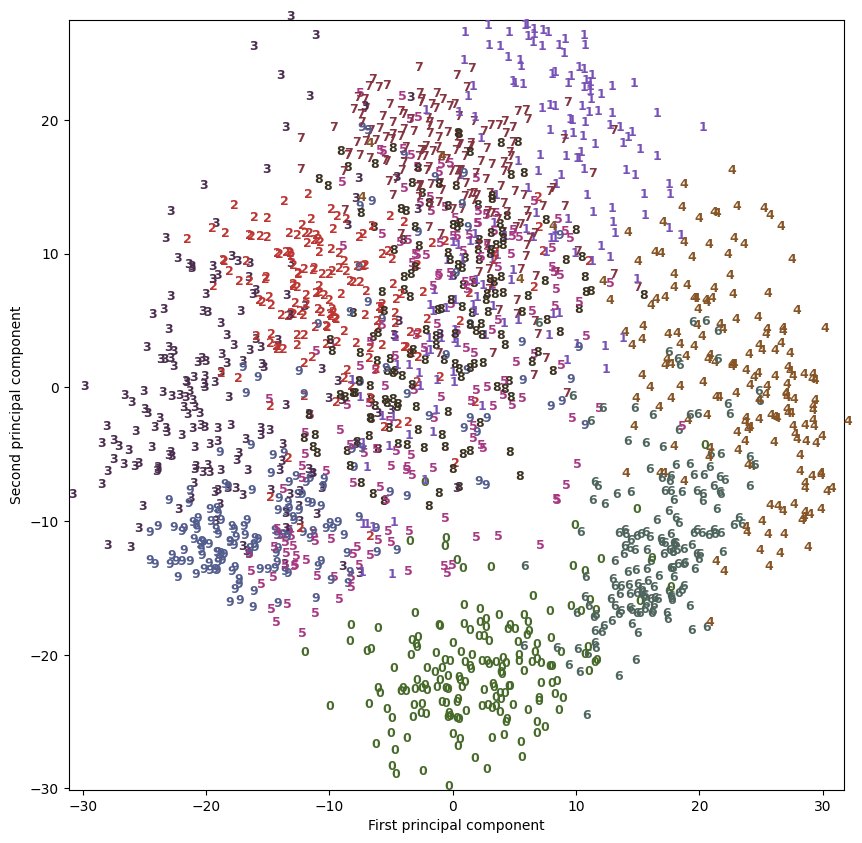

In [15]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Let’s apply t-SNE to the same dataset, and compare the results. As t-SNE does notsupport transforming new data, the TSNE class has no transform method. Instead, we can call the fit_transform method, which will build the model and immediately return the transformed data.

Text(0.5, 0, 't-SNE feature 1')

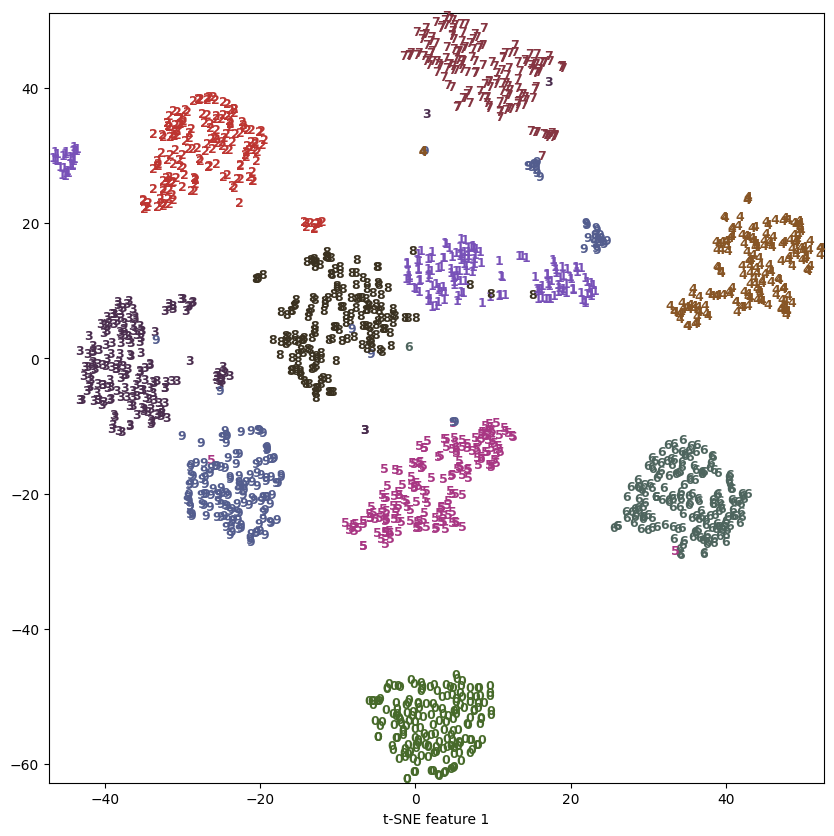

In [12]:
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight': 'bold', 'size': 9})
    plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

The result of t-SNE is quite remarkable. All the classes are quite clearly separated. The ones and nines are somewhat split up, but most of the classes form a single dense group. Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised. Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space. The t-SNE algorithm has some tuning parameters, though it often works well with the default settings. You can try playing with perplexity and early_exaggeration, but the effects are usually minor.